In [1]:
%matplotlib inline

import numpy as np
import cProfile
import random
from SNN_test import *
from NN import *
from WAVreader import *
from copy import deepcopy
from random import shuffle
from scipy.io import wavfile
from scipy.fftpack import fft, dct
from pylab import *
from numpy import dot, outer
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

In [21]:
filelist = ['Audio/1-1.wav',
            'Audio/2-1.wav'
            ]
info = WAVreader(filelist, [], 0.05)
data = info.dataset

14.4615
Scaled 1005 windows down to 751
Finished file Audio/1-1.wav
14.6035
Scaled 883 windows down to 756
Finished file Audio/2-1.wav

Final data set consists of 1499 windows over 2 classes


In [3]:
trainset = []
testset = []
for i in xrange(len(data)):
    if i%10 < 3: testset.append(data[i])
    else: trainset.append(data[i])
print (len(data), len(testset))

(3043, 915)


In [4]:
SNN = SoftmaxNeuralNetwork(input_dim=79, output_dim=info.numClasses)
# print data[0][1]
# SNN.forward_propagation(data[0][0])
# print SNN.predictions
# SNN.backward_propagation(data[0][1])
SNN.train(trainset, maxiter=251, display_progress=True, anneal=lambda x: .01/(100+5*x*info.numClasses))

completed iteration 0; error is 1086.0; size is 0.176761201158
completed iteration 10; error is 559.0; size is 0.185632209909
completed iteration 20; error is 470.0; size is 0.189328102512
completed iteration 30; error is 422.0; size is 0.190463155541
completed iteration 40; error is 384.0; size is 0.191132326161
completed iteration 50; error is 359.0; size is 0.191292090582
completed iteration 60; error is 339.0; size is 0.19135584518
completed iteration 70; error is 311.0; size is 0.191399937706
completed iteration 80; error is 310.0; size is 0.191347410411
completed iteration 90; error is 290.0; size is 0.191281461289
completed iteration 100; error is 302.0; size is 0.191182771238
completed iteration 110; error is 293.0; size is 0.191063783586
completed iteration 120; error is 275.0; size is 0.190944236257
completed iteration 130; error is 258.0; size is 0.190825059479
completed iteration 140; error is 289.0; size is 0.190699450886
completed iteration 150; error is 274.0; size is 0.

In [5]:
# 2-class, alpha=.001, lmbda=.0001, t=101
print SNN.accuracy(trainset), SNN.accuracy(testset)

0.866541353383 0.863387978142


Confusion matrix
[[423  30]
 [ 95 367]]


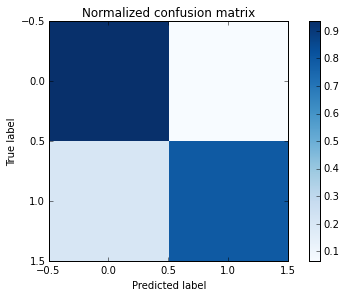

In [6]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

ytrue = []
ypred = []
for clip in testset:
    SNN.forward_propagation(clip[0])
    ypred.append(np.argmax(SNN.predictions))
    ytrue.append(np.argmax(clip[1]))
confusion=confusion_matrix(ytrue, ypred)
cm_normalized = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]
print('Confusion matrix')
print(confusion)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

In [7]:
precisions = np.array([(confusion[i][i]+0.0)/np.sum(confusion, axis=0)[i] for i in range(info.numClasses)])
meanp = np.mean(precisions)
recalls = np.array([(confusion[i][i]+0.0)/sum(confusion[i]) for i in range(info.numClasses)])
meanr = np.mean(recalls)
F1 = 2*meanr*meanp/(meanr+meanp)
print meanp
print meanr
print F1

0.870517782986
0.864073564405
0.867283703166


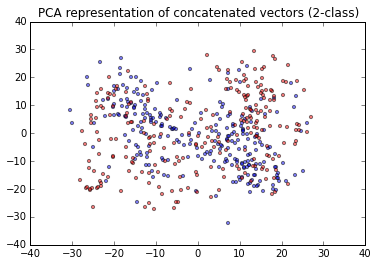

In [34]:
def pcaplot(pull):
    colors = ['red','blue','green','purple','orange','yellow','brown','black']

    X = [dat[0] for dat in pull]
    labels = [(dat[1]+0.0)/info.length*2 for dat in pull]
    pca = PCA(n_components=2)
    pca.fit(X)
    newX = pca.transform(X)
    figure()
    for label in range(info.numClasses,-1,-1):
        series = [newX[i] for i in range(len(newX)) if pull[i][1]==label and i%3==0]
        scatter([x[0] for x in series], [x[1] for x in series],c=colors[label],alpha=0.5,s=10)
    plt.title("PCA representation of concatenated vectors (2-class)")
    show()

pcaplot(info.svmset)

In [ ]:
#SIMPLE TIMER
cProfile.run("rate, x = wavfile.read('5-1.wav');")
print rate, len(x)

         34665 function calls (34281 primitive calls) in 0.040 seconds

   Random listing order was used

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 transforms.py:999(_get_minposy)
       10    0.000    0.000    0.000    0.000 cbook.py:363(__init__)
        1    0.000    0.000    0.000    0.000 figure.py:99(bubble)
      197    0.000    0.000    0.000    0.000 {method 'itervalues' of 'dict' objects}
       20    0.000    0.000    0.000    0.000 artist.py:261(get_transform)
       16    0.000    0.000    0.000    0.000 ticker.py:390(__init__)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:53(take)
    81/78    0.000    0.000    0.000    0.000 {hash}
       10    0.000    0.000    0.000    0.000 cbook.py:495(connect)
       95    0.000    0.000    0.000    0.000 text.py:1020(set_text)
        2    0.000    0.000    0.000    0.000 lines.py:542(set_axes)
      3/2    0.000    0.000    0.000    0.000 tr

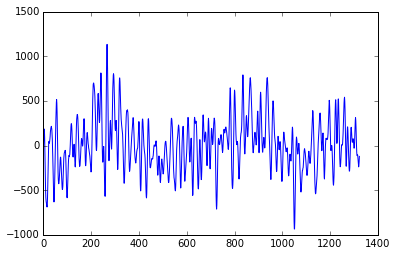

In [28]:
#MORE COMPLEX TIMER - BUT POSSIBLY CAN EXTRACT INFO INTO VARIABLES
import cProfile, pstats, StringIO
pr = cProfile.Profile()
pr.enable()
pr.run("rate, x = wavfile.read('5-1.wav');")
pr.disable()
s = StringIO.StringIO()
ps = pstats.Stats(pr, stream=s).strip_dirs()
ps.print_stats()
print s.getvalue()